In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
import sklearn as sk
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

In [2]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.tight_layout;

In [3]:
#/Users/sofia/Desktop/Herramientas computacionales/ua-imec2001-hc-202310-s2/project/data/wind/wind.csv
dfwind = pd.read_csv(filepath_or_buffer='wind/wind.csv')
dfwind.head()

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1


In [4]:
#Esta parte del codigo cambia los valores que sean =< 27 y >= 7 por 0
dfwind.loc[dfwind['temperature'] >= 27,'wind_speed_ms-1'] = 0
dfwind.loc[dfwind['temperature'] <= 10,'wind_speed_ms-1'] = 0
dfwind

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1
...,...,...,...
26299,2017-12-31 19:00:00,7.44,25.1
26300,2017-12-31 20:00:00,7.72,25.0
26301,2017-12-31 21:00:00,7.98,25.2
26302,2017-12-31 22:00:00,6.77,25.6


In [5]:
#se comprueba que si se hallan cambiando los valores
chequeo = dfwind['temperature'] >= 27
print(dfwind[chequeo].head(2))

                timestamp  wind_speed_ms-1  temperature
3688  2015-06-03 16:00:00              0.0         27.1
3689  2015-06-03 17:00:00              0.0         27.2


In [6]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.tight_layout

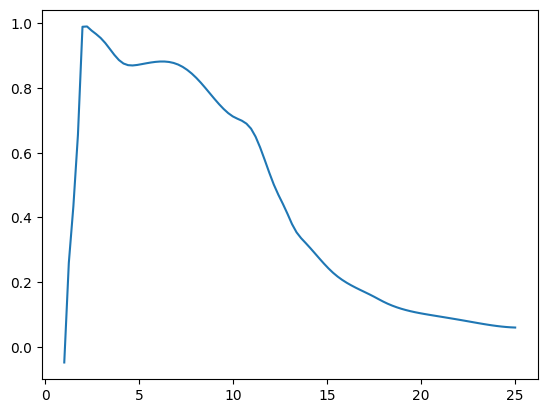

In [7]:
#C:/Users/sofia/Desktop/project/wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv
df_C_empuje = pd.read_csv('wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv')

def interpolador_coeficiente(velocidad_del_viento):
    spline = scipy.interpolate.splrep(df_C_empuje["x"],df_C_empuje["y"],k=3)
    coeficiente = scipy.interpolate.splev(velocidad_del_viento,tck=spline)
    return coeficiente

x = np.linspace(1,25,100)
y = interpolador_coeficiente(x)
plt.plot(x,y)
plt.show()


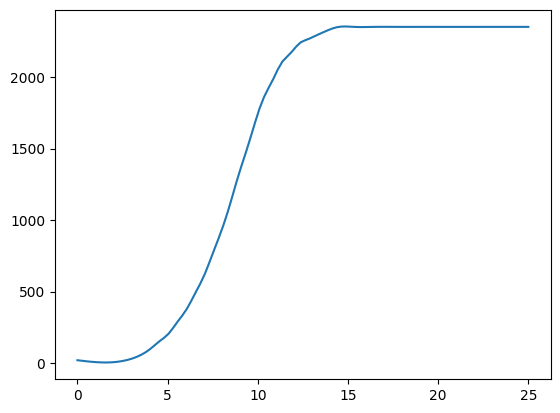

In [8]:

df_potencia = pd.read_csv('wind/Potencia Vs velocidad viento (Corregido).csv')
"""
Como los valores se extrajeron de forma visual hay algunos que sobrepasan los máximos,
por eso se aplica la siguiente funcion que cambia todos los valroes que son mayores al máximo por 2350
"""
def interpolador_potencia(velocidad_del_viento):
    spline = scipy.interpolate.splrep(df_potencia["x"],df_potencia["y"])
    potencia = scipy.interpolate.splev(velocidad_del_viento,spline)
    return potencia
df_potencia.loc[df_potencia['y'] > 2350,'y'] = 2350

x = np.linspace(0,25,100)
y = interpolador_potencia(x)
plt.plot(x,y)

#se chequea con la gráfica que está bien


In [9]:
#velocidad incidente
K_ZG1 = 0.04
K_ZG2_3 = 0.08
D = 92

def velocidad_incidente(velocidad_del_viento,k,x):
    D=92
    
    coeficiente_de_empuje = interpolador_coeficiente(velocidad_del_viento)
    a = (1/2)*(1-np.sqrt(1-coeficiente_de_empuje))
    velocidad_incidente = velocidad_del_viento*(1-((2*a)/(((1+2*k*x)/D)**2)))
    return velocidad_incidente


In [10]:
#generadores 1,2,3,4 y 7 v = v0
#generadores 5 y 6 x=500m, k=K_ZG2_3
#generadores 8 y 9 x=1000m,k=K_ZG2_3
#m=3 n=dfwind.shape[0], puesto que solo hay 3 casos diferentes
headers = ["generadores 1-4 y 7","generadores 5 y 6","generadores 8 y 9"]
df_vx=pd.DataFrame(columns=headers,index=range(dfwind.shape[0]))
print(dfwind.shape[0])
print(df_vx.shape[0])


26304
26304


In [11]:
df_vx["generadores 1-4 y 7"]=dfwind["wind_speed_ms-1"]
df_vx["generadores 5 y 6"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,500)
df_vx["generadores 8 y 9"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,1000)
df_vx

,generadores 1-4 y 7,generadores 5 y 6,generadores 8 y 9
0,10.48,4.386090,8.937538
1,10.40,4.324503,8.862199
2,10.53,4.426779,8.985182
3,10.52,4.418481,8.975612
4,10.37,4.302249,8.834160
...,...,...,...
26299,7.44,1.426126,5.917797
26300,7.72,1.640994,6.181311
26301,7.98,1.874828,6.434688
26302,6.77,1.080129,5.329807


2574804.599101475


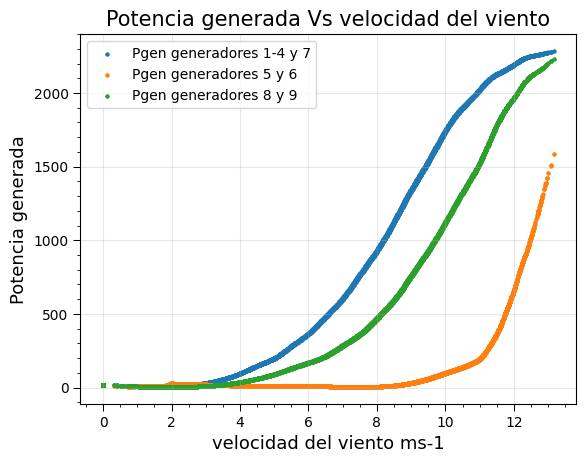

In [12]:
headers2 = ["timestamp","Pgen generadores 1-4 y 7","Pgen generadores 5 y 6","Pgen generadores 8 y 9"]
df_Pg=pd.DataFrame(columns=headers2,index=range(dfwind.shape[0]))
df_Pg["timestamp"]=dfwind["timestamp"]
df_Pg["Pgen generadores 1-4 y 7"]=interpolador_potencia(dfwind["wind_speed_ms-1"])
df_Pg["Pgen generadores 5 y 6"]=interpolador_potencia(df_vx["generadores 5 y 6"])
df_Pg["Pgen generadores 8 y 9"]=interpolador_potencia(df_vx["generadores 8 y 9"])
potencia_total = df_Pg["Pgen generadores 1-4 y 7"].sum()*5+df_Pg["Pgen generadores 5 y 6"].sum()*2+df_Pg["Pgen generadores 8 y 9"].sum()*2
perdidas2porciento = potencia_total*0.02
print(perdidas2porciento)
df_Pg

x = dfwind["wind_speed_ms-1"]
y_potencia_1 = df_Pg["Pgen generadores 1-4 y 7"]
y_potencia_2 = df_Pg["Pgen generadores 5 y 6"]
y_potencia_3 = df_Pg["Pgen generadores 8 y 9"]
plt.scatter(x,y_potencia_1,s=5,label="Pgen generadores 1-4 y 7")
plt.scatter(x,y_potencia_2,s=5,label="Pgen generadores 5 y 6")
plt.scatter(x,y_potencia_3,s=5,label="Pgen generadores 8 y 9")
plt.legend(loc="upper left")
formato_grafica("Potencia generada Vs velocidad del viento","velocidad del viento ms-1","Potencia generada")
plt.show()
#que se interpretan de estos datos???

In [32]:
def energia_electrica(potencia):
    energia_electrica = potencia * (60/60)
    return energia_electrica
headers3 = ["timestamp","energia generadores 1-4 y 7","energia generadores 5 y 6","energia generadores 8 y 9"]
df_energia = pd.DataFrame(columns=headers3,index=range(dfwind.shape[0]))
df_energia["timestamp"]=dfwind["timestamp"]
df_energia["energia generadores 1-4 y 7"]=energia_electrica(df_Pg["Pgen generadores 1-4 y 7"])
df_energia["energia generadores 5 y 6"]=energia_electrica(df_Pg["Pgen generadores 5 y 6"])
df_energia["energia generadores 8 y 9"]=energia_electrica(df_Pg["Pgen generadores 8 y 9"])
columnas_suma = ["energia generadores 1-4 y 7","energia generadores 5 y 6","energia generadores 8 y 9"]
df_energia["Energia total generada"]=df_energia[columnas_suma].sum(axis=1)
#energia en KWH
df_energia


,timestamp,energia generadores 1-4 y 7,energia generadores 5 y 6,energia generadores 8 y 9,Energia total generada
0,2015-01-01 00:00:00,1894.737105,136.082509,1315.786136,3346.605751
1,2015-01-01 01:00:00,1874.166276,129.469965,1284.321634,3287.957875
2,2015-01-01 02:00:00,1907.027175,140.410515,1335.102295,3382.539986
3,2015-01-01 03:00:00,1904.596884,139.531538,1331.256409,3375.384830
4,2015-01-01 04:00:00,1866.085843,127.071884,1272.358203,3265.515929
...,...,...,...,...,...
26299,2017-12-31 19:00:00,745.015346,5.113220,350.714400,1100.842966
26300,2017-12-31 20:00:00,836.719134,5.033222,404.115414,1245.867769
26301,2017-12-31 21:00:00,923.488767,6.009052,465.138063,1394.635883
26302,2017-12-31 22:00:00,545.506051,6.906058,250.567939,802.980048


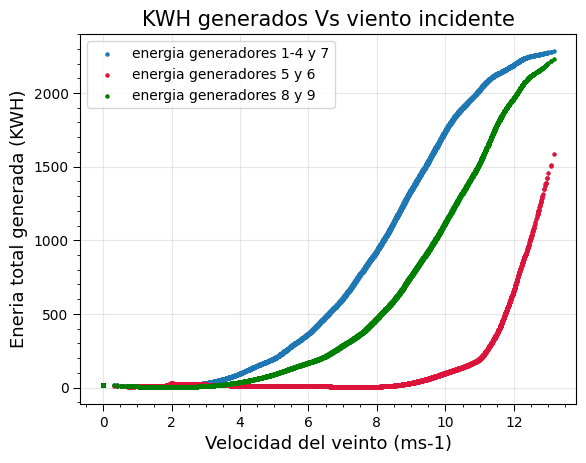

In [14]:
x_velocidad_viento = dfwind["wind_speed_ms-1"]
y_KWH_generados1 = df_energia["energia generadores 1-4 y 7"]
y_KWH_generados2 = df_energia["energia generadores 5 y 6"]
y_KWH_generados3 = df_energia["energia generadores 8 y 9"]
plt.figure()
plt.scatter(x_velocidad_viento,y_KWH_generados1,s=5,label="energia generadores 1-4 y 7")
plt.scatter(x_velocidad_viento,y_KWH_generados2,s=5,color="crimson",label="energia generadores 5 y 6")
plt.scatter(x_velocidad_viento,y_KWH_generados3,s=5,color="green",label="energia generadores 8 y 9")
plt.legend(loc="upper left")

formato_grafica("KWH generados Vs viento incidente","Velocidad del veinto (ms-1)","Eneria total generada (KWH)")
plt.show()

In [62]:
#item 6
# Estimacion del Tiempo de retorno
in_usd_unidad = 1500000
in_cop_unidad = in_usd_unidad * 4883
sumaE = df_energia["Energia total generada"].sum()
TR = (in_cop_unidad * 9)/ (385.44 * sumaE)
# Estimacion del costo nivelado de energia
n = 3 #2015, 2016, 2017
t = [1,2,3]
OM = 250000
F = 0
r = 0.04

años = df_energia["timestamp"].tolist()
energia = df_energia["Energia total generada"].tolist()
lista_de_sumas=[]
for i in t:
    suma_por_año = []
    año = 2014 + i
    for n in range(0, len(años)):
        if int(años[n][:4]) == año:
            suma_por_año.append(energia[n])
    suma_por_año = sum(suma_por_año)
    lista_de_sumas.append(suma_por_año)
lista_de_sumas

Et = lista_de_sumas
LCoE = []
for i in t:
    denominador = (1+r)**i
    LCoEi = ((in_cop_unidad + (OM*i))/(denominador))/(Et[i-1]/denominador)
    LCoE.append(LCoEi)
LCoE = sum(LCoE)
LCoE



2078.3874121380477